# Load the dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 
from keras import layers 

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 데이터셋 불러오기
boston = fetch_openml(name='boston')

# 독립 변수와 종속 변수 나누기
X = boston.data
y = boston.target

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13


In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.557259,6.325672,68.799718,3.765874,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.116792,0.719211,27.665360,2.126032,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.385000,3.863000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.450000,5.889500,46.025000,2.073700,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.538000,6.227500,77.350000,3.107300,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.631000,6.681750,93.475000,5.400700,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     354 non-null    float64 
 1   ZN       354 non-null    float64 
 2   INDUS    354 non-null    float64 
 3   CHAS     354 non-null    category
 4   NOX      354 non-null    float64 
 5   RM       354 non-null    float64 
 6   AGE      354 non-null    float64 
 7   DIS      354 non-null    float64 
 8   RAD      354 non-null    category
 9   TAX      354 non-null    float64 
 10  PTRATIO  354 non-null    float64 
 11  B        354 non-null    float64 
 12  LSTAT    354 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 34.4 KB


In [ ]:
X_train.shape

(354, 13)

In [ ]:
y_train.shape

(354,)

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

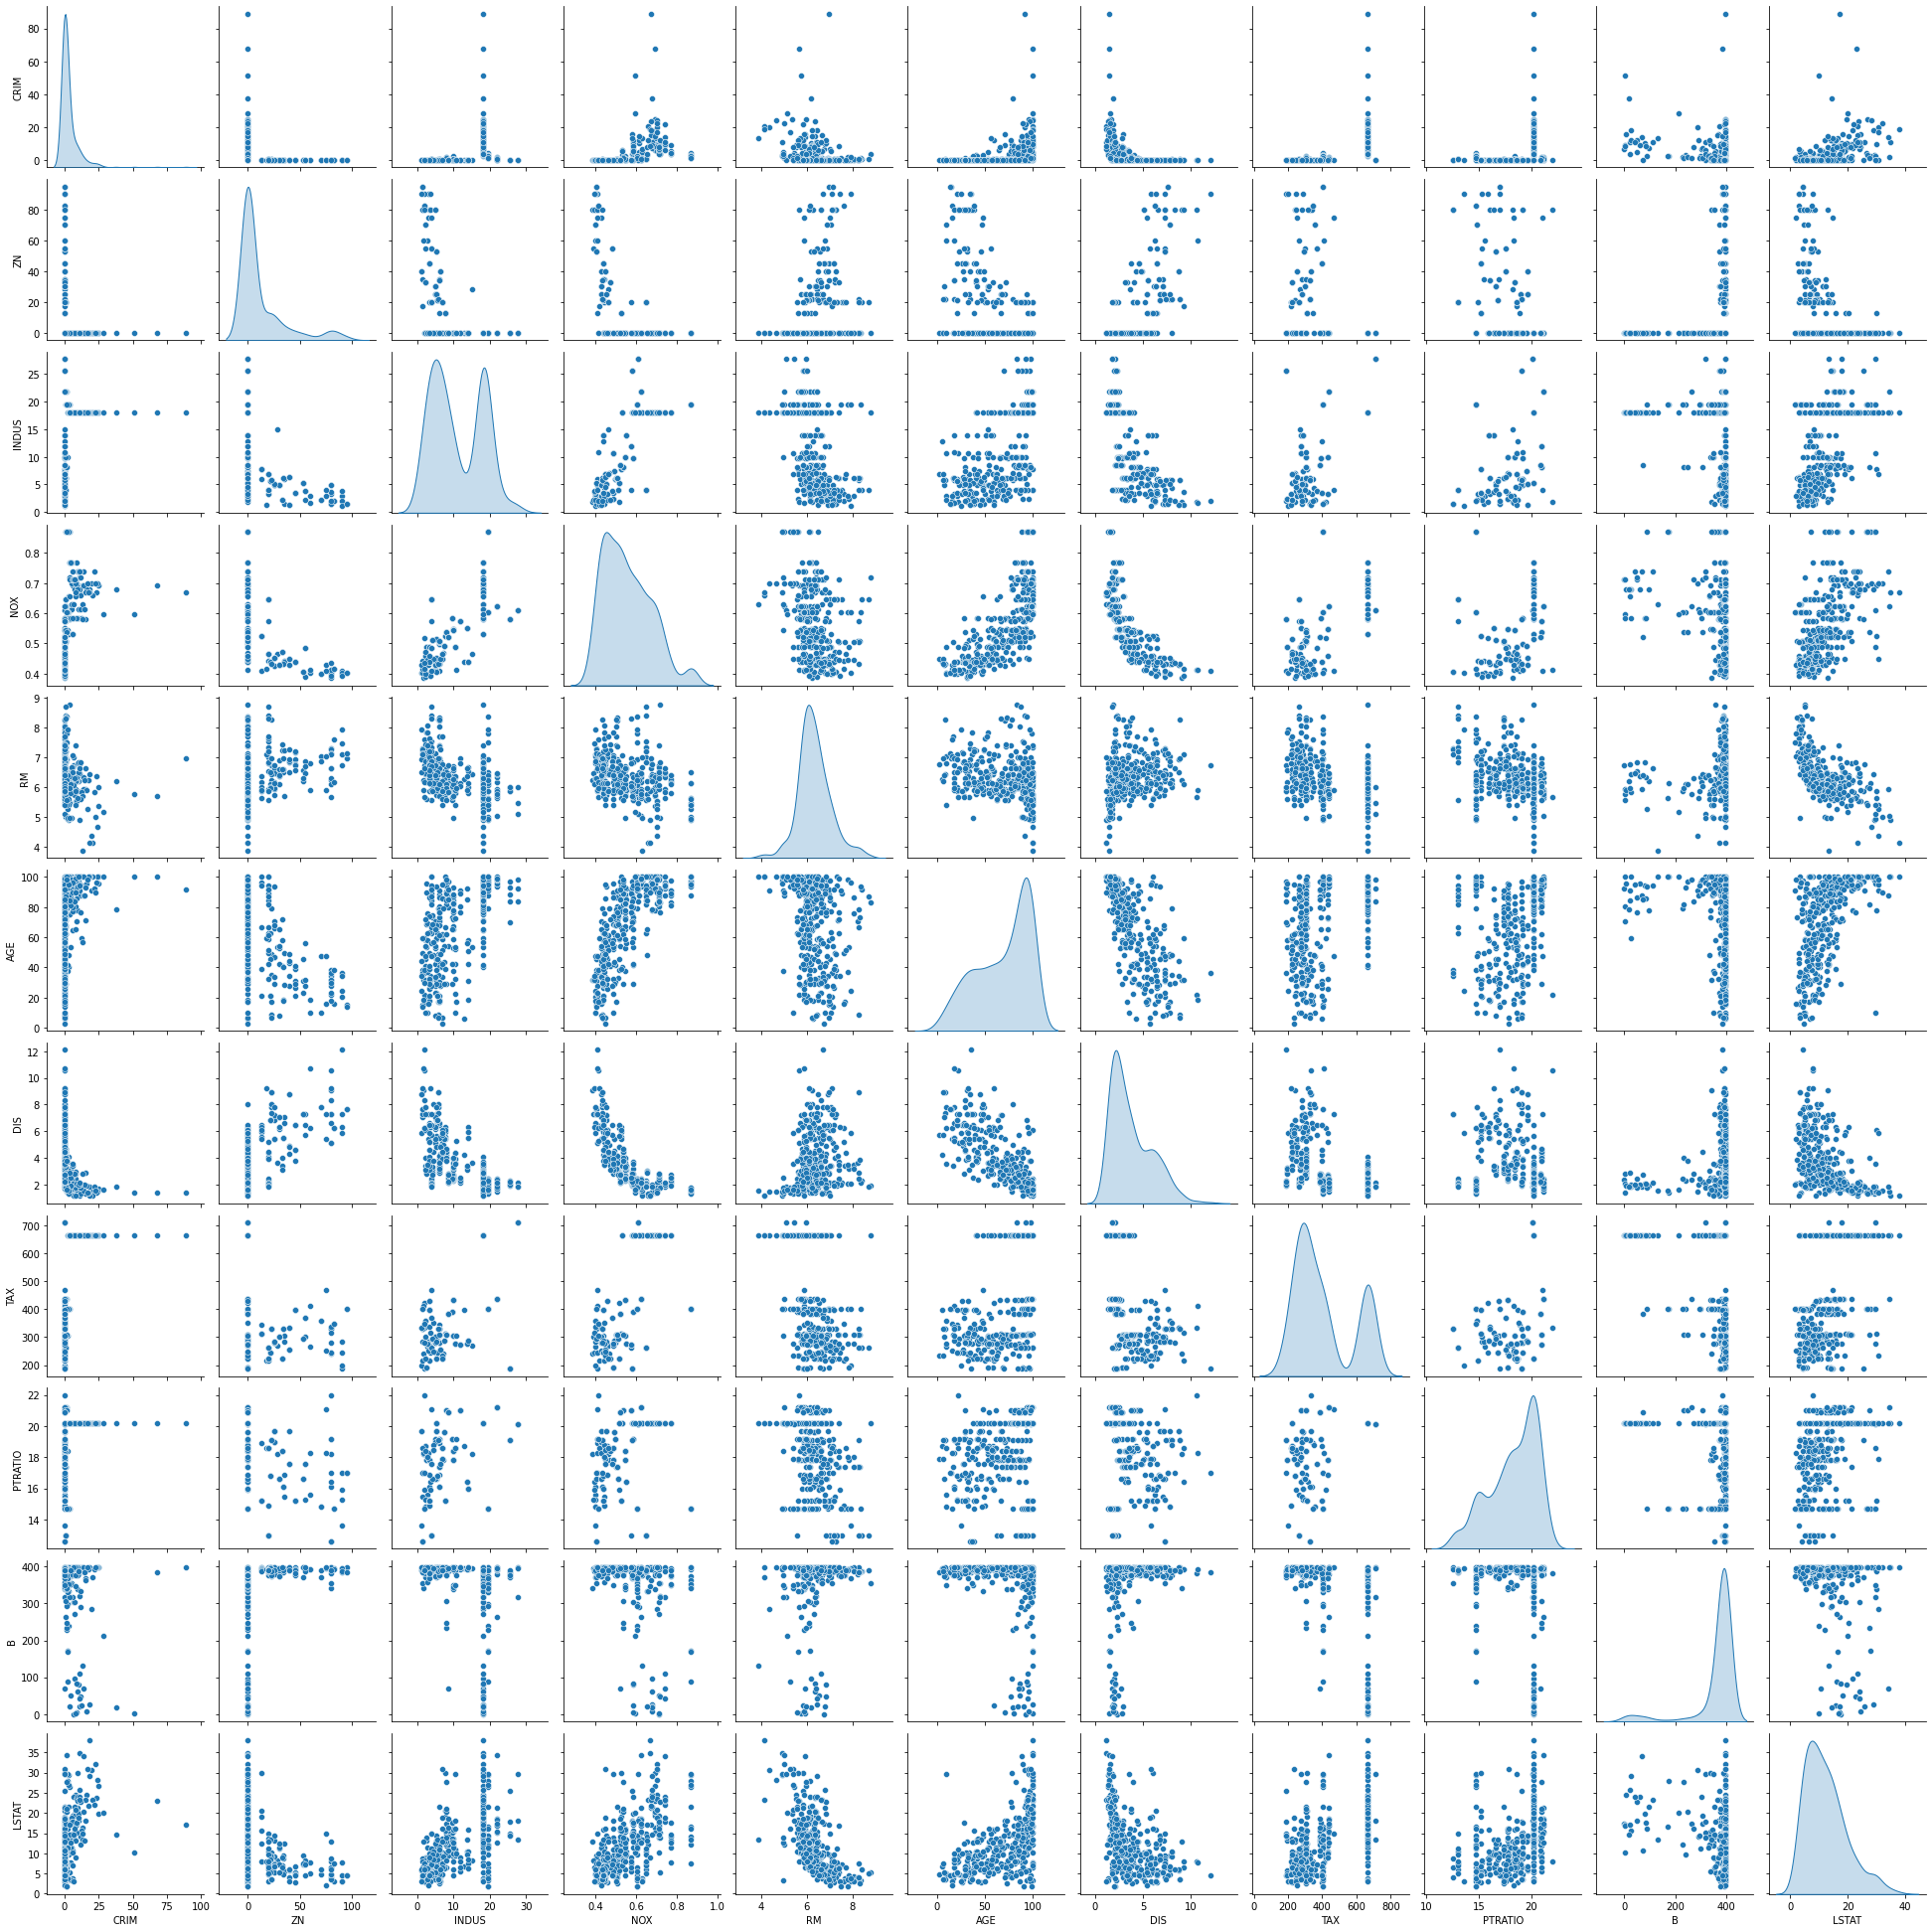

In [ ]:
# 데이터 시각화를 통한 변수간 관계 파악
sns.pairplot(X_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']], diag_kind='kde')

# Build the model

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [ ]:
np.array(X_train)

array([[0.02985, 0.0, 2.18, ..., 18.7, 394.12, 5.21],
       [0.13158, 0.0, 10.01, ..., 17.8, 393.3, 12.04],
       [0.17142, 0.0, 6.91, ..., 17.9, 396.9, 10.21],
       ...,
       [0.01501, 80.0, 2.01, ..., 17.0, 390.94, 5.99],
       [11.1604, 0.0, 18.1, ..., 20.2, 109.85, 23.27],
       [0.22876, 0.0, 8.56, ..., 20.9, 70.8, 10.63]], dtype=object)

In [ ]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train, dtype=float))
print(input_layer.mean.numpy())
print(input_layer.variance.numpy())

[[3.46988654e+00 1.14039545e+01 1.11330500e+01 7.34463260e-02
  5.57259202e-01 6.32567167e+00 6.87997131e+01 3.76587391e+00
  9.43785286e+00 4.07042358e+02 1.82779655e+01 3.59701813e+02
  1.24211283e+01]]
[[6.8957687e+01 5.0969843e+02 4.8008869e+01 6.8051971e-02 1.3601815e-02
  5.1580322e-01 7.6321008e+02 4.5072422e+00 7.4438217e+01 2.7651320e+04
  5.0787234e+00 7.5345723e+03 5.0443371e+01]]


In [ ]:
# Multiple linear regression 모델 생성
linear_model = tf.keras.Sequential([
    input_layer,
    layers.Dense(units=1)
])
 
# 생성한 Linear regression 모델의 구조 확인 
linear_model.summary()

# 최적화 방법 정의
# mean_absolute_error는 절댓값 에러임
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mse')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 13)               27        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 41
Trainable params: 14
Non-trainable params: 27
_________________________________________________________________


In [ ]:
%%time
history = linear_model.fit(X_train, y_train, epochs=500, validation_split = 0.2)

Epoch 1/500
9/9 [==============================] - 1s 28ms/step - loss: 594.1669 - val_loss: 520.9366
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 524.0082 - val_loss: 479.7486
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 478.5238 - val_loss: 438.7174
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 435.4185 - val_loss: 400.8960
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 395.8929 - val_loss: 367.7518
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 364.1543 - val_loss: 336.4682
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 331.8606 - val_loss: 309.1053
Epoch 8/500
9/9 [==============================] - 0s 8ms/step - loss: 303.5351 - val_loss: 283.6986
Epoch 9/500
9/9 [==============================] - 0s 9ms/step - loss: 277.6140 - val_loss: 260.6991
Epoch 10/500
9/9 [==============================] - 0s 9ms/step - loss: 253.4781 - val_los

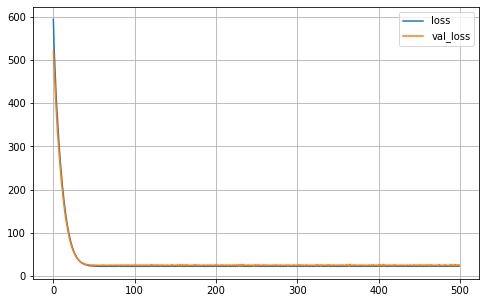

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim()
plt.show()

5/5 [==============================] - 0s 3ms/step


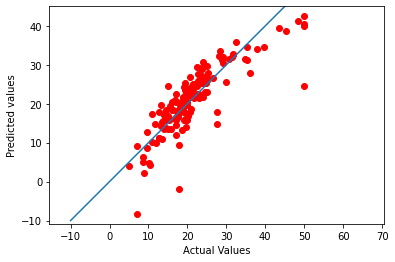

In [ ]:
test_predictions = linear_model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions,c='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-10, 100], [-10, 100])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, test_predictions)

print('Mean Squared Error:', mse)

Mean Squared Error: 22.56655
